# Decision Trees for Regression (Regression Trees)

In [1]:
# import required packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import sample date
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/I_CustomerLoyalty/sample_data_regression.csv"
sample_data = pd.read_csv(data_path)
print(sample_data.shape)
sample_data.head()

(100, 4)


,output,input1,input2,input3
0,564,534,536,466
1,182,264,103,244
2,323,272,339,609
3,438,416,444,330
4,547,520,464,104


In [3]:
# Split data into input and putput objects
X = sample_data.drop(['output'], axis=1)
Y = sample_data['output']
print(X.shape)
X.head()

(100, 3)


,input1,input2,input3
0,534,536,466
1,264,103,244
2,272,339,609
3,416,444,330
4,520,464,104


In [4]:
print(Y.shape)
Y.head()

(100,)


0    564
1    182
2    323
3    438
4    547
Name: output, dtype: int64

In [5]:
# Split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=.2,
                                                    random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train.head()

(80, 3)
(20, 3)
(80,)
(20,)


,input1,input2,input3
55,395,459,738
88,536,529,186
26,486,459,204
42,323,362,368
69,525,535,659


In [9]:
# instantiate our model object
# n estimators is 1000 as just a dummy variable we dont know 
# for sure right now, later tutorial covers the n
regressor = RandomForestRegressor(random_state = 42 , n_estimators=1000)
# regressor = RandomForestRegressor(random_state = 42 , ) # default settings

In [10]:
# train our model
regressor.fit(x_train,y_train)
print(regressor)

RandomForestRegressor(n_estimators=1000, random_state=42)


In [11]:
# assess model accuracy
y_pred = regressor.predict(x_test)
r2_score(y_test,y_pred)

0.6869519329653004

feature importance

In [12]:
regressor.feature_importances_

array([0.40377534, 0.53531939, 0.06090527])

In [14]:
feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names,feature_importance],
                                       axis = 1)
feature_importance_summary.columns = ['input_variable', 'feature_importance']
feature_importance_summary.sort_values(by='feature_importance',inplace=True)
feature_importance_summary.head()

,input_variable,feature_importance
2,input3,0.060905
0,input1,0.403775
1,input2,0.535319


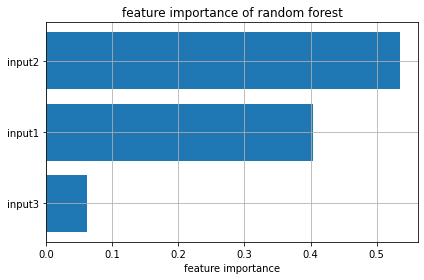

In [15]:
plt.barh(feature_importance_summary['input_variable'],feature_importance_summary['feature_importance'])
plt.title("feature importance of random forest")
plt.xlabel("feature importance")
# plt.ylabel("y label")
plt.tight_layout()
plt.grid(True)
plt.show()

input 3 was deemed far less important 
stakeholders can understand what is driving the predictions of the model